<a href="https://colab.research.google.com/github/GabrielRibeiro5402/-rvores-de-Decis-o-aprofundando-em-modelos-de-Machine-Learning/blob/main/Aprofundando_em_%C3%81rvores_de_Decis%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo a base de dados

---



## Vamos utilizar uma base de dados de fraude de cartão de crédito, é uma base de dados com dados reais. Ela está disponível no Kaggle.
link: (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code)

In [67]:
import pandas as pd

In [68]:
dados = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#  Analisando a base de dados

---



## O próximo passo agora vai ser fazermos uma análise breve desses nossos dados para entendermos um pouco com o que estamos trabalhando. Já sabemos um pouco do contexto desses dados, agora vamos fazer uma pequena análise.

In [69]:
dados.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
n_transacoes = dados['Class'].count()
n_fraudes = dados['Class'].sum()
n_normais = n_transacoes - n_fraudes
fraudes_porc = (n_fraudes/n_transacoes)*100
normais_porc = (n_normais/n_transacoes)*100

print(f'Numero de Transações: {n_transacoes}')
print(f'Numero de Fraudes: {n_fraudes}, {fraudes_porc :.2f}%')
print(f'Numero de Transações normais: {n_normais}, {normais_porc:.2f}%')

Numero de Transações: 284807
Numero de Fraudes: 492, 0.17%
Numero de Transações normais: 284315, 99.83%


# Criando uma árvore de decisão com o scikit-learn

---



## O próximo passo para criamos nossa árvore é dividirmos os nossos dados entre dados de treino, que serão usados para construir o nosso modelo; e dados de teste, que serão usados para testar o nosso modelo e vermos se ele está bom. Então, primeiro vamos fazer essa divisão, de fato.

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

def executar_validador(X, y):
  validador = StratifiedShuffleSplit(n_splits= 1, test_size = 0.1, random_state=0)
  for train_id, test_id, in validador.split(X, y):
    X_train, X_test = X[train_id], X[test_id]
    y_train, y_test = y[train_id], y[test_id]
  return X_train, X_test, y_train, y_test

In [72]:
%%time
from sklearn import tree

def executar_classificador(classificador, X_train, X_test, y_train):
  arvore = classificador.fit(X_train, y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 17.6 µs


In [73]:
#Execução do validador
X = dados.drop('Class', axis= 1).values
y = dados['Class']
X_train, X_test, y_train, y_test = executar_validador(X, y)

In [74]:
#Execução do classificador DecissionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

# Gerando uma imagem da árvore

---



In [75]:
import matplotlib.pyplot as plt

def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize= 14)
  plt.savefig(nome)
  plt.close()

In [76]:
#Criaçào da figura da Arvore de Decisão
salvar_arvore(classificador_arvore_decisao, 'arvore_decisao1.png')

# Medindo a acurácia da árvore

---



In [77]:
from sklearn.metrics import accuracy_score

def validar_arvore(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))

In [78]:
#validacao da arvore de decisao
validar_arvore(y_test, y_pred_arvore_decisao)

0.9990871107053826


A acurácia vai de 0 a 1 e está dizendo que conseguimos uma acurácia de 0.99%. Parece ser muito bom. 0.99, que entre 0 e 100% seria 99%. Então para analisarmos melhor e entendermos se isso é realmente muito bom, vamos colocar também a matriz de confusão.

# Matriz de confusão

---



A matriz de confusão diz exatamente quantas transações foram classificadas corretamente, quantas dessas transações eram transações com fraude, quantas dessas transações eram transações sem fraude. Então ela nós dá exatamente esses valores e a partir desses valores que é calculada a acurácia.

In [79]:
from sklearn.metrics import confusion_matrix

def validar_arvore(y_test, y_pred):
  print(confusion_matrix(y_test, y_pred))

In [80]:
validar_arvore(y_test, y_pred_arvore_decisao)

[[28420    12]
 [   14    35]]


Então a partir daqui conseguimos saber qual foi o número de acertos y_pred. Para calcularmos o número de acertos, somamos 28.419 com 36, que são a soma das transações sem fraude e com fraude. Então, com isso, chegamos no nosso resultado final, que é aquele de 0.99 que vimos antes, ou seja 99% de acerto.

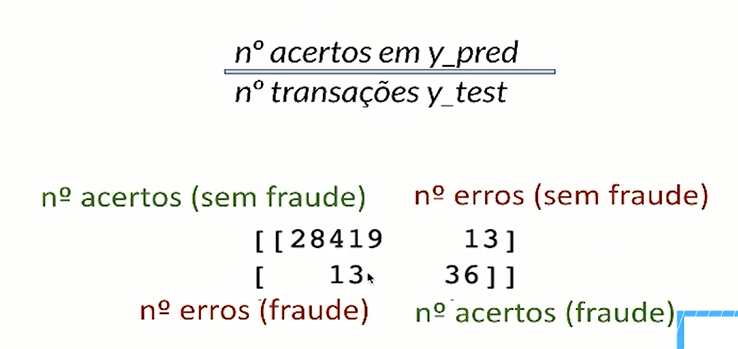

Mas podemos ver que 13 das transações com fraude de 36 não representa 99%. Se formos considerar só as transações com fraude, não tivemos 99% de acerto. Se considerarmos todas as transações como a acurácia faz, tudo bem, mas eu não consigo diferenciar. Isso acontece por causa do desbalanceamento dos nossos dados. Por isso se deve usar de outras métricas para avaliar.

#  Medindo além da acurácia

---



## Calculando a precisão

Então temos a classificação real, com fraude, e temos a classificação que foi prevista pela nossa árvore de decisão. Então para calcularmos a precisão, fazemos o número de acertos com fraude dividido pelo número de transações com fraude.

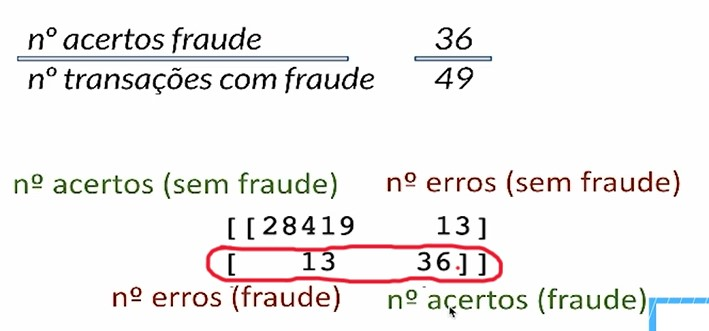

In [81]:
from sklearn.metrics import precision_score

def validar_arvore(y_test, y_pred):
  print(precision_score(y_test, y_pred))

In [82]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.7446808510638298


Para conseguirmos 100%, classificamos todas as transações do nosso conjunto como transações com fraude, ou seja, acertamos todas as transações com fraude, mas também acabamos classificando muitas transações que não são fraudes como fraudes.
Então é por isso que utilizamos outra métrica também e geralmente a precisão é usada em conjunto com essa métrica, que é chamada de `recall`. Então vamos ver como funciona o `recall`.

## Calculando recall

Basicamente, nós temos a classificação prevista pela árvore de decisão, somente as com fraude de novo. Então vamos fazer o número de acertos das transações com fraude pelo número de transações que foram classificadas como fraudes.

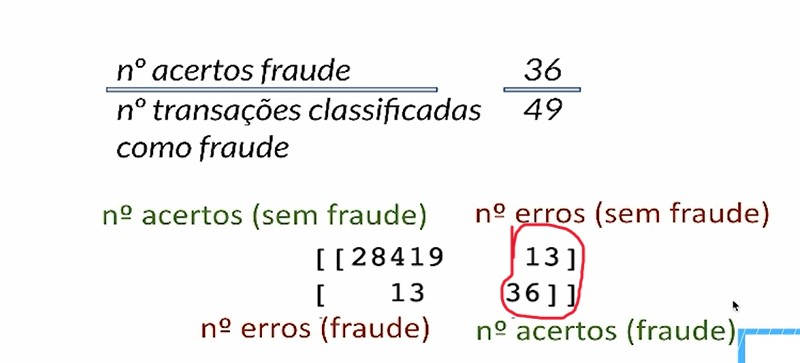

In [83]:
from sklearn.metrics import recall_score

def validar_arvore(y_test, y_pred):
  print(recall_score(y_test, y_pred))

In [84]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.7142857142857143


E temos o valor de **75** de `recall`. **69%** de `precisão` e **75%** de `recall`. Então esses são os valores finais. Podemos ver que essas métricas, tirando a acurácia, são medianas, são valores que vão de 0 a 1 e são valores bons, não são valores ruins, mas podemos melhorar ainda mais esses valores se entendermos um pouco mais algumas características da nossa árvore de decisão.

# Analisando as características da árvore

---



In [85]:
print(classificador_arvore_decisao.get_depth())

21


Podemos ver que a profundidade da árvore é igual a 21, ou seja, é considerada uma profundidade grande. Não conseguimos definir qual é o parâmetro ideal de profundidade da árvore, não temos um parâmetro ideal para isso.

In [92]:
%%time

#Execução do classificador DecissionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

CPU times: user 19.6 s, sys: 22.9 ms, total: 19.6 s
Wall time: 22.1 s


Então vamos mudar esse parâmetro 10. Criaremos uma nova cédula, agora em cima, vamos copiar toda a parte da execução do classificador. Só que agora vamos passar como parâmetro, max_depht = 10.


---


E outra coisa que podemos fazer também é o random_state, para garantirmos que teremos os mesmos valores. Vamos executar nosso classificador. Por enquanto, já vou copiar a cédula referente a validação da árvore.

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def validar_arvore(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(precision_score(y_test, y_pred))
  print(recall_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))


In [88]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.9994733330992591
0.9473684210526315
0.7346938775510204
[[28430     2]
 [   13    36]]


Já podemos ver que melhoramos bastnte porem o nosso `recall` piorou vamos tenatar melhorar.

In [89]:
#Execução do classificador DecissionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

Vamos colocar mais um parâmetro, vamos digitar o `min_samples_leaf=10`, que vai definir qual é o número mínimo de instâncias, no nosso caso de transações, que eu tenho que ter em cada folha sempre. Vamos definir o mínimo como 10.


In [90]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.9993679997191109
0.8604651162790697
0.7551020408163265
[[28426     6]
 [   12    37]]


Podemos ver que o `recall` melhorou um pouco, mas mesmo assim, agora o que acontece é que o `precision` piorou! Então, no caso, forçar a árvore até no mínimo 10 transações em cada nó não foi uma boa escolha, então podemos ignorar esse parâmetro nesse caso específico.

# Aprendendo o que são os modelos ensemble

---

Vimos que uma árvore com grande profundidade pode levar ao ***overfit***, que é quando o modelo fica muito especializado nos dados de treinamento que estamos utilizando.

Estamos trabalhando com transações de dois dias, poderíamos trabalhar com transações de 10 dias, 30 dias, então teríamos muito mais que 284 mil transações na nossa base de dados. Tudo isso faria que o nosso problema fosse mais complexo e que precisássemos de um algoritmo mais robusto para resolvermos o nosso problema, para conseguirmos detectar uma maior quantidade de transações com fraude e detectar as transações corretamente.

Então, como que poderíamos fazer isso? Uma das alternativas que existem para fazermos isso são modelos mais complexos, é utilizando o que chamamos de `ensemble learning` - **que é quando utilizamos múltiplos modelos; no nosso caso, múltiplas árvores de decisão. Essas árvores são simples e uma complementa a outra para ajudar a obter overfit e ajudar a melhorar os resultados.**

# Executando o Random Forest com o scikit-learn

---
Vamos colocar a mão na massa e vamos implementar o random forest utilizando o scikit-learn. Então vamos lá. Primeiro passo vamos criar uma cédula nova e vamos importar `from sklearn.ensemble import RandomForestClassifier.`

Vamos passar como parâmetro o número de estimadores igual a 100, que nada mais é que o número de árvores que vamos criar:` (n_estimators=100).`

In [95]:
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(n_estimators=100, random_state = 0)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

CPU times: user 6min 37s, sys: 470 ms, total: 6min 37s
Wall time: 7min 9s


In [96]:
salvar_arvore(classificador_random_forest.estimators_[0], 'random_forest1')
salvar_arvore(classificador_random_forest.estimators_[1], 'random_forest2')

In [97]:
validar_arvore(y_test, y_pred_random_forest)

0.9995084442259752
0.9487179487179487
0.7551020408163265
[[28430     2]
 [   12    37]]


In [98]:
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(max_depth=10, n_estimators=50, random_state = 0)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

CPU times: user 1min 59s, sys: 152 ms, total: 1min 59s
Wall time: 2min 3s


In [99]:
validar_arvore(y_test, y_pred_random_forest)

0.9995435553526912
0.9736842105263158
0.7551020408163265
[[28431     1]
 [   12    37]]


Conseguimos ver que o resultado de `recall` ficou a mesma coisa, mas conseguimos uma boa melhora no resultado de `precisão`, de **0.94** para **0.97**. Então já conseguimos melhorar um pouco. Além disso, nós conseguimos um tempo muito menor.

#  Executando o AdaBoost com o scikit-learn

---



Vamos criar uma variável para o `adaboost`, primeiro temos que importar o `adaboost`. Então digitamos `from sklearn.ensemble import adaboostClassifier` Código in-line. Então vamos agora chamar o `adaboostClassifier`, vamos chamar o `random state`.

In [100]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 1min 48s, sys: 114 ms, total: 1min 48s
Wall time: 1min 50s


In [101]:
validar_arvore(y_test, y_pred_adaboost)

0.9992626663389628
0.8888888888888888
0.6530612244897959
[[28428     4]
 [   17    32]]


In [102]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 3min 44s, sys: 279 ms, total: 3min 44s
Wall time: 3min 54s


In [103]:
validar_arvore(y_test, y_pred_adaboost)

0.999403110845827
0.8636363636363636
0.7755102040816326
[[28426     6]
 [   11    38]]


In [104]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=200)
y_pred_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 7min 44s, sys: 605 ms, total: 7min 45s
Wall time: 8min 25s


In [105]:
validar_arvore(y_test, y_pred_adaboost)

0.9995435553526912
0.9285714285714286
0.7959183673469388
[[28429     3]
 [   10    39]]


E obtivemos um bom resultado, um resultado similar ao **random forest**. A diferença é que o tempo de execução, você deve ter notado, demorou para rodar, Até mais que a primeira execução que fizemos do **random forest**.

# CONCLUSÕES

---



---




###  agora depende muito da prioridade, se fôssemos escolher um para rodar, para resolver o nosso problema, será que preferimos um valor de precisão maior? No caso, seriam mais transações sendo detectadas como fraudes? Deixa passar menos transições que têm fraudes? Ou será que preferimos um valor de recall maior? Que seria menos ligações para o cliente dizendo que o cartão foi bloqueado sem motivo.


---



### Então depende muito da prioridade da nossa empresa, nesse caso. Então são 2 algoritmos super robustos que utilizam técnicas muito robustas, que são bagging e boosting, que nós podemos utilizar.